# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Made Praba Jaya Kusuma
- **Email:** prabajaya20@gmail.com
- **ID Dicoding:** mdepraba

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim pada tahun 2011 hingga 2012?
- Bagaimana perbandingan penyewaan sepeda di hari libur dibandingkan hari kerja pada tahun 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

### Setup dan Install Libarary jika menggunakan environtment Anaconda pada Google Colab

In [3]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [4]:
# condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# !conda install streamlit pandas matplotlib seaborn numpy altair -y

### Import Library

In [1]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

Mountin drive dengan google colab

In [13]:
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Mengambil file yang berada dalam drive
# df_day = pd.read_csv('/content/drive/MyDrive/submission-bike-sharing/data/day.csv', delimiter=',')
# df_hour = pd.read_csv('/content/drive/MyDrive/submission-bike-sharing/data/hour.csv', delimiter=',')


df_day = pd.read_csv('data/day.csv', delimiter=',')
df_hour = pd.read_csv('data/hour.csv', delimiter=',')

In [20]:
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [27]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Membaca data hour.csv dan day.csv menggunakan library pandas
- Menampilkan 5 baris teratas untuk memastikan dataset telah berhasil terbaca

### Assessing Data

**Mengidentifikasi missing value**

In [38]:
print("Data daily:\n", df_day.isnull().sum())
print("\nData hourly:\n", df_hour.isnull().sum())

Data daily:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data hourly:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


****

**Mengidentifikasi duplicated data**

In [34]:
print(df_day.duplicated().sum())
print(df_hour.duplicated().sum())

0


0

**Mengidentifikasi outlier dari kolom 'cnt'**

In [65]:
numeric_day = df_day.select_dtypes(include=[np.number])
numeric_hour = df_hour.select_dtypes(include=[np.number])

q25_day, q75_day = np.percentile(numeric_day["cnt"], 25), np.percentile(numeric_day["cnt"], 75)
q25_hour, q75_hour = np.percentile(numeric_hour["cnt"], 25), np.percentile(numeric_hour["cnt"], 75)

cutoff_day = 1.5 * (q75_day - q25_day)
cutoff_hour = 1.5 * (q75_hour - q25_hour)

minimum_day, maximum_day = q25_day - cutoff_day, q75_day + cutoff_day
minimum_hour, maximum_hour = q25_hour - cutoff_hour, q75_hour + cutoff_hour

outliers_day = [x for x in numeric_day["cnt"] if x < minimum_day or x > maximum_day]
print("outliers in daily dataset: ", outliers_day)
outliers_hour = [x for x in numeric_hour["cnt"] if x < minimum_hour or x > maximum_hour]
print("outliers in hourly dataset: ", outliers_hour)

outliers in daily dataset:  []
outliers in hourly dataset:  [651, 644, 712, 676, 734, 662, 782, 749, 713, 746, 651, 686, 690, 679, 685, 648, 721, 801, 750, 801, 729, 779, 649, 810, 801, 662, 957, 830, 686, 657, 664, 684, 644, 658, 654, 703, 681, 729, 757, 800, 684, 744, 759, 822, 698, 655, 643, 646, 692, 744, 704, 656, 738, 671, 678, 678, 660, 658, 681, 712, 676, 673, 781, 775, 677, 748, 776, 700, 819, 668, 649, 691, 654, 732, 709, 664, 702, 654, 653, 683, 664, 681, 743, 666, 729, 813, 704, 706, 643, 769, 680, 717, 710, 705, 732, 770, 779, 659, 678, 733, 650, 873, 846, 852, 868, 745, 812, 669, 704, 730, 672, 645, 785, 785, 719, 692, 798, 752, 653, 781, 710, 671, 839, 796, 693, 827, 785, 694, 668, 679, 647, 702, 644, 684, 686, 678, 644, 662, 665, 834, 822, 645, 710, 850, 790, 668, 724, 782, 681, 869, 813, 700, 793, 723, 651, 800, 831, 681, 653, 713, 857, 744, 671, 719, 867, 823, 653, 823, 693, 723, 673, 811, 795, 643, 691, 672, 646, 833, 791, 656, 900, 824, 687, 843, 804, 643, 705, 697,

**Insight:**
- Tidak ada missing value pada kedua dataset
- Tidak ada duplicated data
- Tidak ada outlier pada data daily, namun terdapat banyak outlier pada data hourly
- Oleh karena itu, hanya menggunakan data daily saja. Selain itu, berdasarkan pertanyaan juga tidak memerlukan data hourly. Meskipun demikian, analisis hasil dari pertanyaan kedua dapat dikembangkan lebih lanjut dengan mempertimbangkan jam kerja.

### Cleaning Data

Membuat variable yang akan berisi dataset yang bersih

In [3]:
df = df_day

**Mengganti kolom 'dteday' yang bertipe object menjadi datetime**

In [4]:
df['dteday'] = pd.to_datetime(df_day['dteday'])
print(df['dteday'].dtype)

datetime64[ns]


**Menghapus kolom yang tidak relevan**

In [5]:
df.drop(columns=['instant', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit'], inplace=True)
print(df.columns)

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'casual', 'registered', 'cnt'],
      dtype='object')


**Insight:**
- Membuat variabel dataframe baru agar tidak mengubah dataframe yang berisi dataset semula
- Mengganti tipe data 'dteday' yang sebelumny bertipe object menjadi datetime agar lebih mudah mengoperasikan kedepannya
- Menghapus: kolom id ('instant'), 'temp', 'atemp', 'hum', 'windspeed', 'weathersit'. Karena berdasarkan pertanyaan, diperlukan kolom yang bisa menidentifikasi hari kerja, hari libur, dan musim.

## Exploratory Data Analysis (EDA)

### Explore ...

**Penyewaan sepeda berdasarkan musim**

In [6]:
seasonal = df_day.groupby('season')['cnt'].mean().round().astype(int)
print(seasonal)

season
1    2604
2    4992
3    5644
4    4728
Name: cnt, dtype: int32


**Penyewaan Sepeda berdasarkan hari kerja dan hari libur**

In [7]:
workday_rent = df_day.groupby('workingday')['cnt'].mean().round().astype(int)
print(workday_rent)

workingday
0    4330
1    4585
Name: cnt, dtype: int32


**Insight:**
- Mengelompokan data berdasarkan 'season' dan 'workingday' dengan method groupby()
- Menggunakan method mean() untuk mendapatkan rata-rata dari total penyewaan sepeda harian pada kolom 'cnt'.
- Menggunakan method .round().astype(int) untuk membulatkan hasil rata-rata dan menjadikan integer

## Visualization & Explanatory Analysis

### Pertanyaan 1:

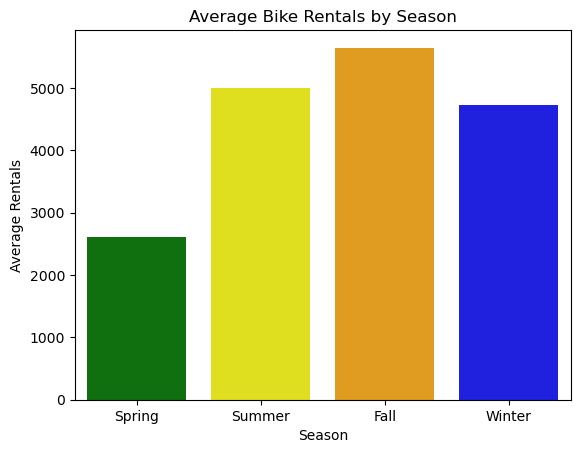

In [8]:
seasonal.index = seasonal.index.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_colors = ['green', 'yellow', 'orange', 'blue']

sns.barplot(x=seasonal.index, y=seasonal.values, palette=season_colors)
plt.title('Average Bike Rentals by Season')
plt.ylabel('Average Rentals')
plt.xlabel('Season')
plt.show()

**Pola Penggunaan Sepeda Berdasarkan Musim**
- Rata-rata penyewaan sepeda pada **Musim Semi** adalah **2604**.
- Rata-rata penyewaan sepeda pada **Musim Panas** adalah **4992**.
- Rata-rata penyewaan sepeda pada **Musim Gugur** adalah **5664**.
- Rata-rata penyewaan sepeda pada **Musim Dingin** adalah **4728**.

### Pertanyaan 2:

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


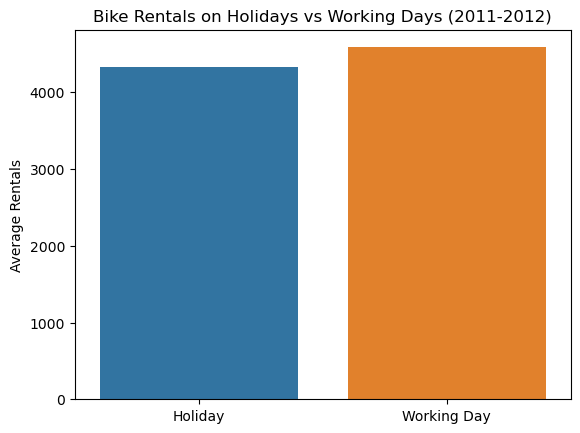

In [9]:
sns.barplot(x=['Holiday', 'Working Day'], y=workday_rent.values)
plt.title('Bike Rentals on Holidays vs Working Days (2011-2012)')
plt.ylabel('Average Rentals')
plt.show()

**Perbandingan Penyewaan Sepeda di Hari Libur dan Hari Kerja**
- Rata-rata penyewaan sepeda pada **Hari Libur** adalah **4330**.
- Rata-rata penyewaan sepeda pada **Hari Kerja** adalah **4585**.


**Insight:**
- Penggunaan sepeda meningkat secara signifikan selama musim panas dan musim gugur. Hal ini mungkin disebabkan oleh cuaca yang lebih hangat dan kondusif untuk bersepeda di luar ruangan.
- Rata-rata penyewaan sepeda di hari kerja sedikit lebih tinggi dibandingkan dengan hari libur, yaitu selisih 255, meskipun perbedaannya tidak terlalu signifikan.

## Analisis Lanjutan (Opsional)

Menggunakan RFM Analisis untuk mengelompokan berdasarkan perilaku bulanan pelanggan

Clustering berdasarkan usage/penyewaan dalam bulanan

In [68]:
filtered_data = df[['season', 'cnt', 'workingday']]
seasonal_avg = filtered_data.groupby('season')['cnt'].mean().round().astype(int)
print("Rata-rata Penyewaan Berdasarkan Musim (Season):")
print(seasonal_avg)


Rata-rata Penyewaan Berdasarkan Musim (Season):
season
1    2604
2    4992
3    5644
4    4728
Name: cnt, dtype: int32


In [56]:
df['seasonal_avg'] = df['season'].map(seasonal_avg['cnt'])
bins = [0, 2000, 4000, seasonal_avg['cnt'].max()]
labels = ['Low Usage', 'Medium Usage', 'High Usage']

# Menambahkan kolom 'usage_cluster' ke DataFrame seasonal_avg
seasonal_avg = pd.DataFrame(seasonal_avg)  # Ubah Series menjadi DataFrame agar bisa ditambahkan kolom
seasonal_avg['usage_cluster'] = pd.cut(seasonal_avg['cnt'], bins=bins, labels=labels, include_lowest=True)
print(seasonal_avg)

         cnt usage_cluster
season                    
1       2604  Medium Usage
2       4992    High Usage
3       5644    High Usage
4       4728    High Usage


Clustering berdasarkan usage/penyewaan dalam harian

In [65]:
bins = [0, 3000, 6000, df['cnt'].max()]
df['usage_cluster'] = pd.cut(df['cnt'], bins=bins, labels=labels, include_lowest=True)

print("Hasil Clustering Penyewaan Sepeda Berdasarkan Jumlah Penyewaan:")
print(df[['season', 'cnt', 'usage_cluster']])

Hasil Clustering Penyewaan Sepeda Berdasarkan Jumlah Penyewaan:
     season   cnt usage_cluster
0         1   985     Low Usage
1         1   801     Low Usage
2         1  1349     Low Usage
3         1  1562     Low Usage
4         1  1600     Low Usage
..      ...   ...           ...
726       1  2114     Low Usage
727       1  3095  Medium Usage
728       1  1341     Low Usage
729       1  1796     Low Usage
730       1  2729     Low Usage

[731 rows x 3 columns]


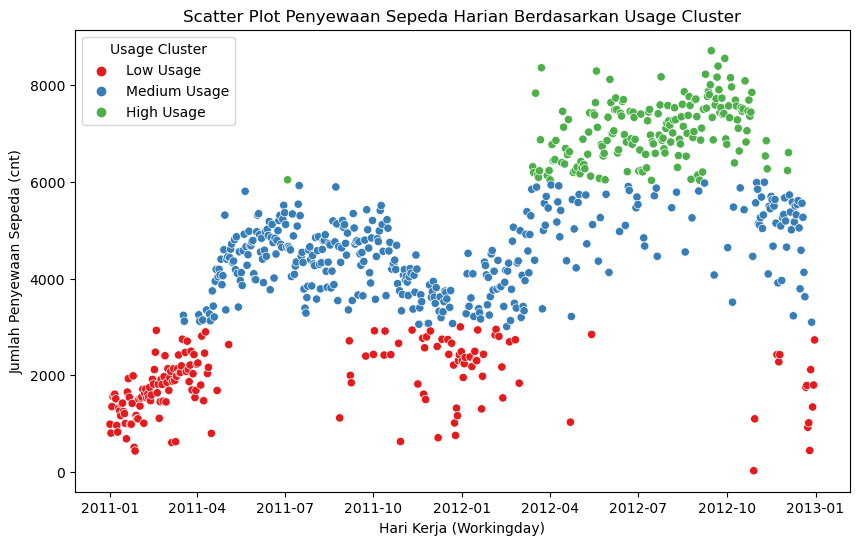

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dteday', y='cnt', hue='usage_cluster', palette='Set1')

plt.title('Scatter Plot Penyewaan Sepeda Harian Berdasarkan Usage Cluster')
plt.xlabel('Hari Kerja (Workingday)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.legend(title='Usage Cluster')
plt.show()

## Conclusion

- Musim berperan penting dalam memengaruhi tingkat penyewaan sepeda, dengan puncaknya terjadi di **musim gugur**.
- **Hari kerja** memiliki sedikit lebih banyak penyewaan dibandingkan hari libur, yang menunjukkan adanya peran sepeda sebagai **alat transportasi sehari-hari**, bukan hanya untuk rekreasi.